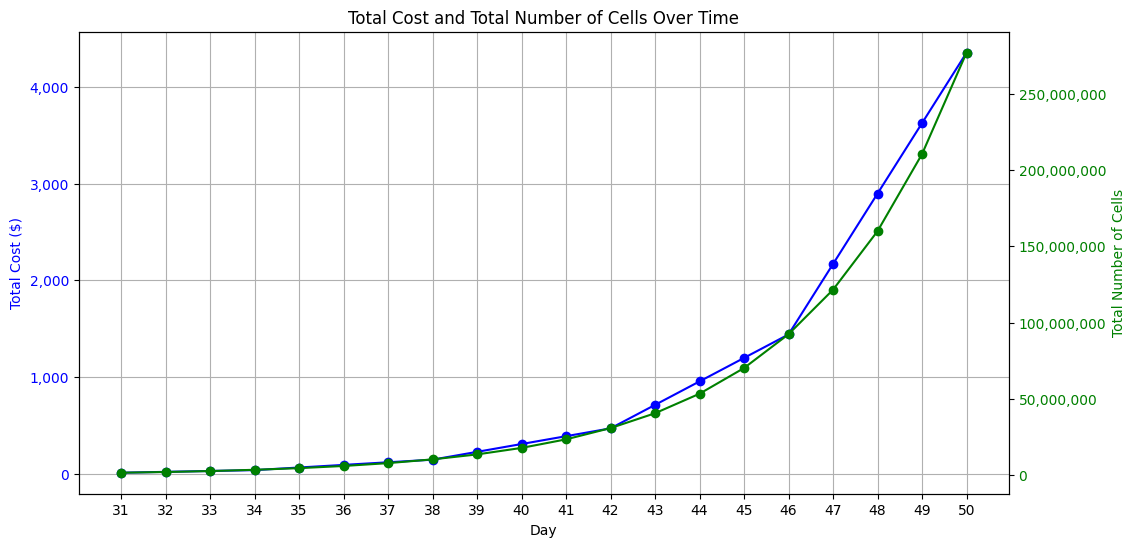

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Constants
N0 = 1_500_000  # Initial number of cells
Nf = 3 * N0  # Final number of cells after 4 days
T = 4  # Time over which cells triple
cells_per_dish = 1_000_000  # Number of cells per dish
initial_dishes = 3  # Starting with 3 dishes
media_per_dish_ml = 10  # 10 ml of media per dish
bottle_volume_ml = 500  # Each media bottle contains 500 ml
bottle_cost = 150  # Cost per bottle ($)
cost_per_ml = bottle_cost / bottle_volume_ml  # Cost per milliliter

# Calculate cell numbers for days 31 to 50
days = np.arange(31, 51)
cell_numbers = N0 * (Nf / N0) ** ((days - 31) / T)

# Calculate the change in cell numbers day to day
daily_changes = np.diff(cell_numbers, prepend=N0)

# Calculate the number of dishes needed and media required
dishes_needed = initial_dishes * 3 ** ((days - 31) // T)
daily_media_needed = dishes_needed * media_per_dish_ml
total_media_needed = np.cumsum(daily_media_needed)

# Calculate the daily cost and total cost
daily_cost = daily_media_needed * cost_per_ml
total_cost = np.cumsum(daily_cost)

# Create a Pandas DataFrame
data = {
    "Day": days,
    "Total Number of Cells": cell_numbers.astype(int),
    "Change from Previous Day": daily_changes.astype(int),
    "Dishes Needed": dishes_needed.astype(int),
    "Daily Media Needed (ml)": daily_media_needed.astype(int),
    "Daily Cost ($)": daily_cost.astype(int),
    "Media Used Until this day (ml)": total_media_needed.astype(int),
    "Total Cost ($)": total_cost.astype(int)
}

df = pd.DataFrame(data)
df["Total Number of Cells"] = df["Total Number of Cells"].apply(lambda x: f"{x:,}")
df["Change from Previous Day"] = df["Change from Previous Day"].apply(lambda x: f"{x:,}")
df["Dishes Needed"] = df["Dishes Needed"].apply(lambda x: f"{x:,}")
df["Daily Media Needed (ml)"] = df["Daily Media Needed (ml)"].apply(lambda x: f"{x:,}")
df["Daily Cost ($)"] = df["Daily Cost ($)"].apply(lambda x: f"{x:,}")
df["Media Used Until this day (ml)"] = df["Media Used Until this day (ml)"].apply(lambda x: f"{x:,}")
df["Total Cost ($)"] = df["Total Cost ($)"].apply(lambda x: f"{x:,}")

# Plotting Day vs. Total Cost and Total Number of Cells
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Cost
ax1.plot(df["Day"], total_cost, marker='o', linestyle='-', color='b', label='Total Cost ($)')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Cost ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis to show commas

# Set x-ticks to show every day
ax1.set_xticks(days)

# Plot Total Number of Cells on the same plot with a different y-axis
ax2 = ax1.twinx()
ax2.plot(df["Day"], cell_numbers, marker='o', linestyle='-', color='g', label='Total Number of Cells')
ax2.set_ylabel('Total Number of Cells', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis to show commas

# Add grid and title
plt.title('Total Cost and Total Number of Cells Over Time')
ax1.grid(True)

# Show the plot
plt.show()

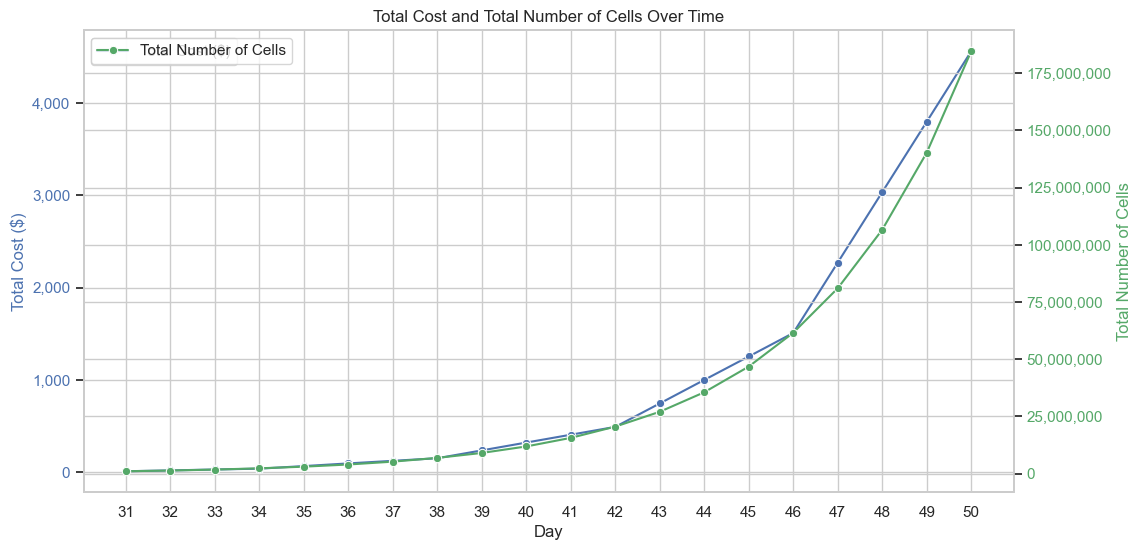

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# Set Seaborn style
sns.set(style="whitegrid")

# Constants
N0 = 1_000_000  # Initial number of cells (1,000,000 as an integer)
Nf = 3 * N0  # Final number of cells after 4 days
T = 4  # Time over which cells triple
cells_per_dish = 1_000_000  # Number of cells per dish
initial_dishes = 3  # Starting with 3 dishes
media_per_dish_ml = 10  # 10 ml of media per dish
bottle_volume_ml = 500  # Each media bottle contains 500 ml
bottle_cost = 150  # Cost per bottle ($)
cost_per_ml = bottle_cost / bottle_volume_ml  # Cost per milliliter
normocin_cost_per_ml = 284 / 20  # Normocin cost per ml

# Calculate cell numbers for days 31 to 50
days = np.arange(31, 51)
cell_numbers = N0 * (Nf / N0) ** ((days - 31) / T)

# Calculate the change in cell numbers day to day
daily_changes = np.diff(cell_numbers, prepend=N0)

# Calculate the number of dishes needed and media required
dishes_needed = initial_dishes * 3 ** ((days - 31) // T)
daily_media_needed = dishes_needed * media_per_dish_ml
total_media_needed = np.cumsum(daily_media_needed)

# Calculate the Normocin cost for each day
daily_normocin_cost = daily_media_needed * normocin_cost_per_ml / 1000

# Calculate the daily cost and total cost
daily_cost = (daily_media_needed * cost_per_ml) + daily_normocin_cost
total_cost = np.cumsum(daily_cost)

# Create a Pandas DataFrame
data = {
    "Day": days,
    "Total Number of Cells": cell_numbers.astype(int),
    "Change from Previous Day": daily_changes.astype(int),
    "Dishes Needed": dishes_needed.astype(int),
    "Daily Media Needed (ml)": daily_media_needed.astype(int),
    "Daily Normocin Cost ($)": daily_normocin_cost.astype(float),
    "Daily Cost ($)": daily_cost.astype(int),
    "Media Used Until this day (ml)": total_media_needed.astype(int),
    "Total Cost ($)": total_cost.astype(int)
}

df = pd.DataFrame(data)

# Plotting Day vs. Total Cost and Total Number of Cells with Seaborn
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Cost
sns.lineplot(x="Day", y="Total Cost ($)", data=df, ax=ax1, color="b", marker="o", label="Total Cost ($)")
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Cost ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis to show commas

# Plot Total Number of Cells on the same plot with a different y-axis
ax2 = ax1.twinx()
sns.lineplot(x="Day", y="Total Number of Cells", data=df, ax=ax2, color="g", marker="o", label="Total Number of Cells")
ax2.set_ylabel('Total Number of Cells', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis to show commas

# Set x-ticks to show every day
ax1.set_xticks(days)

# Add grid and title
plt.title('Total Cost and Total Number of Cells Over Time')
ax1.grid(True)

# Show the plot
plt.show()

In [8]:
df

,Day,Total Number of Cells,Change from Previous Day,Dishes Needed,Daily Media Needed (ml),Daily Normocin Cost ($),Daily Cost ($),Media Used Until this day (ml),Total Cost ($)
0,31,1000000,0,3,30,0.426,9,30,9
1,32,1316074,316074,3,30,0.426,9,60,18
2,33,1732050,415976,3,30,0.426,9,90,28
3,34,2279507,547456,3,30,0.426,9,120,37
4,35,3000000,720492,9,90,1.278,28,210,65
5,36,3948222,948222,9,90,1.278,28,300,94
6,37,5196152,1247930,9,90,1.278,28,390,122
7,38,6838521,1642368,9,90,1.278,28,480,150
8,39,9000000,2161478,27,270,3.834,84,750,235
9,40,11844666,2844666,27,270,3.834,84,1020,320


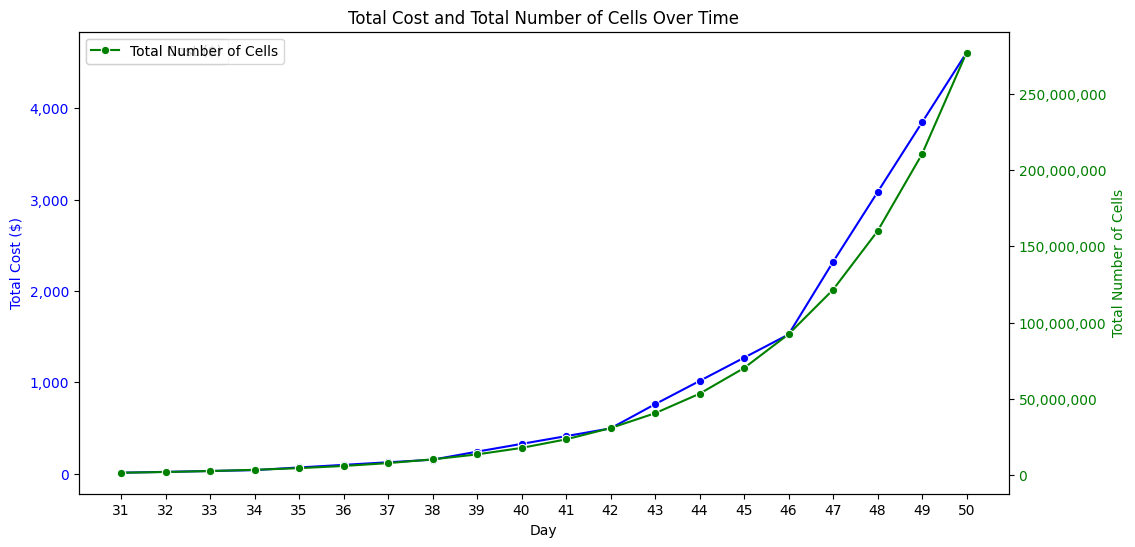

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter


# Constants
N0 = 1_500_000  # Initial number of cells (1,000,000 as an integer)
Nf = 3 * N0  # Final number of cells after 4 days
T = 4  # Time over which cells triple
cells_per_dish = 1_000_000  # Number of cells per dish
initial_dishes = 3  # Starting with 3 dishes
media_per_dish_ml = 10  # 10 ml of media per dish
bottle_volume_ml = 500  # Each media bottle contains 500 ml
bottle_cost = 150  # Cost per bottle ($)
cost_per_ml = bottle_cost / bottle_volume_ml  # Cost per milliliter
normocin_cost_per_ml = 284 / 20  # Normocin cost per ml
trypsin_cost_per_plate = 0.124166666666667  # Trypsin cost per plate

# Calculate cell numbers for days 31 to 50
days = np.arange(31, 51)
cell_numbers = N0 * (Nf / N0) ** ((days - 31) / T)

# Calculate the change in cell numbers day to day
daily_changes = np.diff(cell_numbers, prepend=N0)

# Calculate the number of dishes needed and media required
dishes_needed = initial_dishes * 3 ** ((days - 31) // T)
daily_media_needed = dishes_needed * media_per_dish_ml
total_media_needed = np.cumsum(daily_media_needed)

# Calculate the Normocin cost for each day
daily_normocin_cost = daily_media_needed * normocin_cost_per_ml / 1000

# Calculate the Trypsin cost for passage days (every 4th day)
daily_trypsin_cost = np.where((days - 31) % 4 == 0, dishes_needed * trypsin_cost_per_plate, 0)

# Calculate the daily cost and total cost
daily_cost = (daily_media_needed * cost_per_ml) + daily_normocin_cost + daily_trypsin_cost
total_cost = np.cumsum(daily_cost)

# Create a Pandas DataFrame
data = {
    "Day": days,
    "Total Number of Cells": cell_numbers.astype(int),
    "Change from Previous Day": daily_changes.astype(int),
    "Dishes Needed": dishes_needed.astype(int),
    "Daily Media Needed (ml)": daily_media_needed.astype(int),
    "Daily Normocin Cost ($)": daily_normocin_cost.astype(float),
    "Daily Trypsin Cost ($)": daily_trypsin_cost.astype(float),
    "Daily Cost ($)": daily_cost.astype(int),
    "Media Used Until this day (ml)": total_media_needed.astype(int),
    "Total Cost ($)": total_cost.astype(float)
}

df = pd.DataFrame(data)

# Plotting Day vs. Total Cost and Total Number of Cells with Seaborn
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Cost
sns.lineplot(x="Day", y="Total Cost ($)", data=df, ax=ax1, color="b", marker="o", label="Total Cost ($)")
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Cost ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis to show commas

# Plot Total Number of Cells on the same plot with a different y-axis
ax2 = ax1.twinx()
sns.lineplot(x="Day", y="Total Number of Cells", data=df, ax=ax2, color="g", marker="o", label="Total Number of Cells")
ax2.set_ylabel('Total Number of Cells', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis to show commas

# Set x-ticks to show every day
ax1.set_xticks(days)

# Add grid and title
plt.title('Total Cost and Total Number of Cells Over Time')

# Show the plot
plt.show()

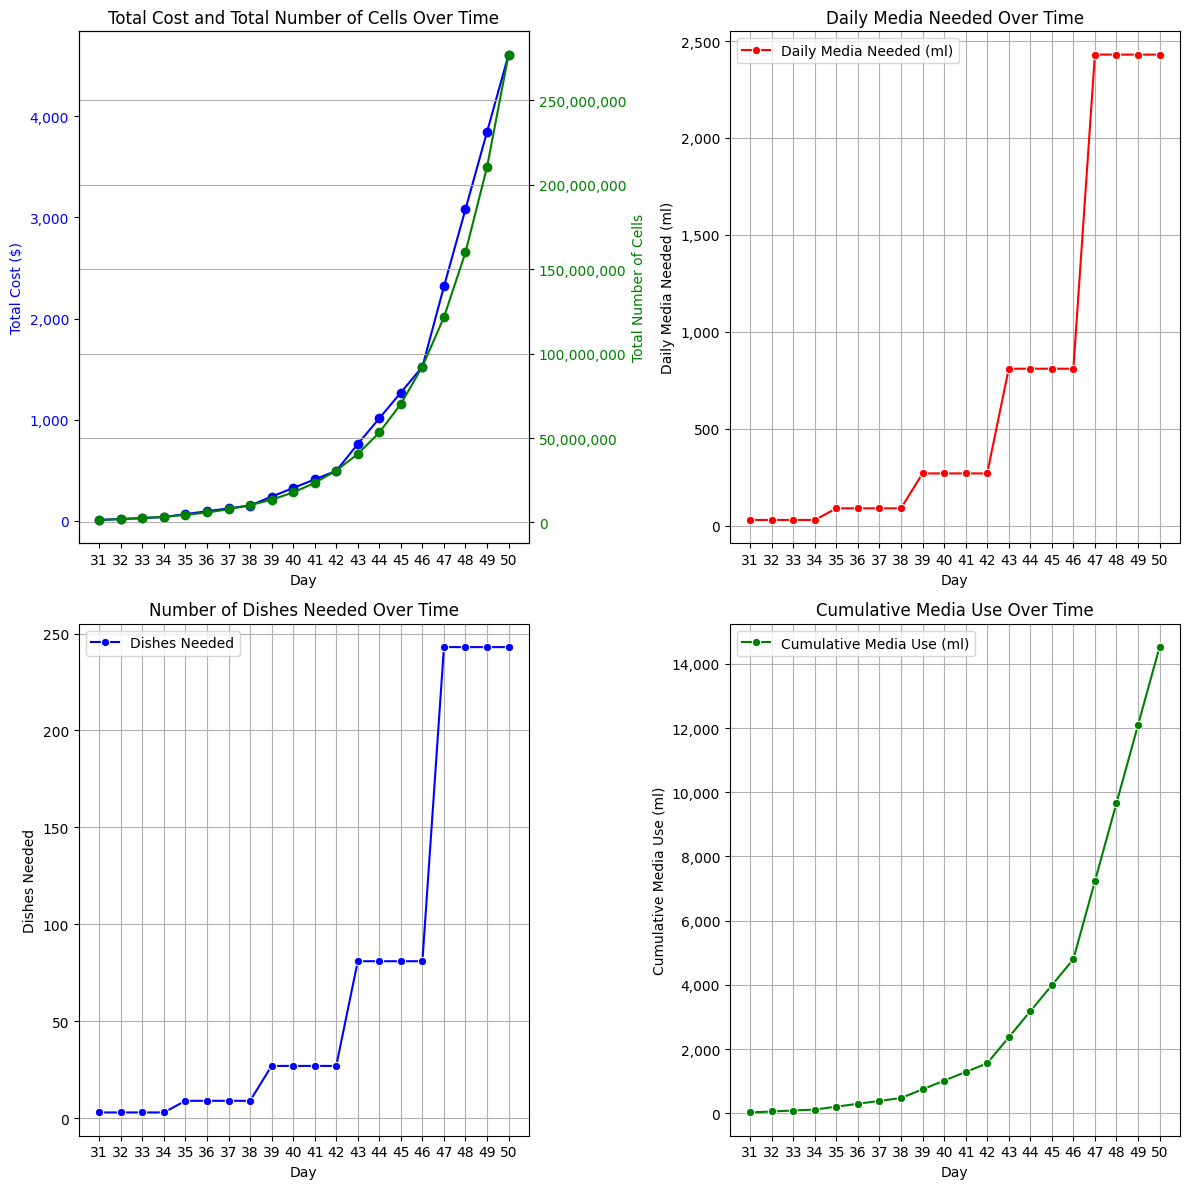

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# Constants
N0 = 1_500_000  # Initial number of cells
Nf = 3 * N0  # Final number of cells after 4 days
T = 4  # Time over which cells triple
initial_dishes = 3  # Starting with 3 dishes
media_per_dish_ml = 10  # 10 ml of media per dish
bottle_volume_ml = 500  # Each media bottle contains 500 ml
bottle_cost = 150  # Cost per bottle ($)
cost_per_ml = bottle_cost / bottle_volume_ml  # Cost per milliliter
normocin_cost_per_ml = 284 / 20  # Normocin cost per ml
trypsin_cost_per_plate = 0.124166666666667  # Trypsin cost per plate

# Calculate cell numbers for days 31 to 50
days = np.arange(31, 51)
cell_numbers = N0 * (Nf / N0) ** ((days - 31) / T)

# Calculate the change in cell numbers day to day
daily_changes = np.diff(cell_numbers, prepend=N0)

# Calculate the number of dishes needed and media required
dishes_needed = initial_dishes * 3 ** ((days - 31) // T)
daily_media_needed = dishes_needed * media_per_dish_ml
total_media_needed = np.cumsum(daily_media_needed)

# Calculate the Normocin cost for each day
daily_normocin_cost = daily_media_needed * normocin_cost_per_ml / 1000

# Calculate the Trypsin cost for passage days (every 4th day)
daily_trypsin_cost = np.where((days - 31) % 4 == 0, dishes_needed * trypsin_cost_per_plate, 0)

# Calculate the daily cost and total cost
daily_cost = (daily_media_needed * cost_per_ml) + daily_normocin_cost + daily_trypsin_cost
total_cost = np.cumsum(daily_cost)

# Create a Pandas DataFrame
data = {
    "Day": days,
    "Total Number of Cells": cell_numbers.astype(int),
    "Change from Previous Day": daily_changes.astype(int),
    "Dishes Needed": dishes_needed.astype(int),
    "Daily Media Needed (ml)": daily_media_needed.astype(int),
    "Daily Normocin Cost ($)": daily_normocin_cost.astype(float),
    "Daily Trypsin Cost ($)": daily_trypsin_cost.astype(float),
    "Daily Cost ($)": daily_cost.astype(int),
    "Media Used Until this day (ml)": total_media_needed.astype(int),
    "Total Cost ($)": total_cost.astype(float)
}

df = pd.DataFrame(data)

# Plotting the subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Subplot 1: Total Cost and Total Number of Cells Over Time
ax1 = axs[0, 0]
ax1.plot(df["Day"], total_cost, marker='o', linestyle='-', color='b', label='Total Cost ($)')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Cost ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax1.set_xticks(days)
ax1.set_xticklabels(days)
#ax1.grid(True)

# Plot Total Number of Cells on the same plot with a different y-axis
ax2 = ax1.twinx()
ax2.plot(df["Day"], cell_numbers, marker='o', linestyle='-', color='g', label='Total Number of Cells')
ax2.set_ylabel('Total Number of Cells', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax2.grid(True)

ax1.set_title('Total Cost and Total Number of Cells Over Time')

# Subplot 2: Daily Media Needed Over Time
ax3 = axs[0, 1]
sns.lineplot(x="Day", y="Daily Media Needed (ml)", data=df, ax=ax3, color="r", marker="o", label="Daily Media Needed (ml)")
ax3.set_xlabel('Day')
ax3.set_ylabel('Daily Media Needed (ml)')
ax3.set_title('Daily Media Needed Over Time')
ax3.set_xticks(days)
ax3.set_xticklabels(days)
ax3.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax3.grid(True)

# Subplot 3: Number of Dishes Needed Over Time
ax4 = axs[1, 0]
sns.lineplot(x="Day", y="Dishes Needed", data=df, ax=ax4, color="b", marker="o", label="Dishes Needed")
ax4.set_xlabel('Day')
ax4.set_ylabel('Dishes Needed')
ax4.set_title('Number of Dishes Needed Over Time')
ax4.set_xticks(days)
ax4.set_xticklabels(days)
ax4.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax4.grid(True)

# Subplot 4: Cumulative Media Use Over Time
ax5 = axs[1, 1]
sns.lineplot(x="Day", y="Media Used Until this day (ml)", data=df, ax=ax5, color="g", marker="o", label="Cumulative Media Use (ml)")
ax5.set_xlabel('Day')
ax5.set_ylabel('Cumulative Media Use (ml)')
ax5.set_title('Cumulative Media Use Over Time')
ax5.set_xticks(days)
ax5.set_xticklabels(days)
ax5.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax5.grid(True)

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('cell_growth_cost_analysis.pdf')

# Show the plot
plt.show()

In [22]:
df.to_csv("from_day_30_to_50.csv", index = False)